# 17-Mole Balances

## Risk Estimate: Concentration

Prior to implementing control techniques, it can be important to quantify the risk of exposure from a spill scenario of other toxic gas/ vapor release.

### Total Mole (Mass) and Component Mole Balances 

Given a control volume and:
- A release of toxic gas or vapor at a constant rate
- Addition of air at a constant rate
- Exit of the gasses based on the inlet conditions and assuming that the exit rate can be achieved without pressurization of the control volume
- Steady state conditions

Total molar balance:

$$ \text{Rate of accumulation} = \text{Rate of inlet} - \text{Rate of exit} + \text{Generation rate} $$

$$ \frac{dn_{tot}}{dt} = n_{in} - n_{out} + n_{gen} $$

Component balances:

$$ \frac{dn_{i}}{dt} = n_{in,i} - n_{out,i} + n_{gen,i} $$

At steady state, the accumulation terms ($ \frac{dn_{tot}}{dt} $ and $ \frac{dn_{i}}{dt} $) are zero.

Other assumptions/ notation: 
- concentration of interest, $ C_i  = n_i/V $,
- the exit rate of the total gases is $ Q^n_v $, mol//time,
- the inlet rate of the composition of interest is $ Q^e $, mol//time,
- $ C_{ppm} = C_iRT/P\cdot 10^6 $, where $ C_{ppm} $ is the concentration in parts per million (ppm), $ R $ is the ideal gas constant, $ T $ is the temperature, and $ P $ is the pressure.
- $ n_{gen,i} = 0 $, for the case of a spill or release of a toxic gas or vapor (new species are not generated).
- Perfect mixing of the gases in the control volume (no concentration gradients).



As such, the mole balance for the component of interest i is 

$$ 0 = Q^e - C_iQ^n_vRT/P $$

$$ C_i = \frac{Q^e}{Q^n_vRT/P} $$

If however, there are concentration gradients, the concentration could deviate significantly from the above estimate (larger or smaller).

### Inlet composition from vaporization of a liquid

The inlet rate of the species of interest, $ Q^e $, can be estimated from the vapor pressure of the liquid and the rate of vaporization and a mass transfer coefficient according to:

$$ Q^e = k_mA(C_{sat}-C) $$

where $ k_m $ is the mass transfer coefficient, $ C_{sat} $ is the saturation concentration of the species close to the liquid surface, and C is the concentration of the species in the air, and $ A $ is the area of the spill.

$ k_m $ can be estimated from correlations or from experimental data or by comparison to another component with a known mass transfer coefficient (e.g. water, $ k_m^0 $).: 

$$ k_m = k_m^0\left(\frac{M}{M_0}\right)^{0.33} $$

where $ M $ is the molecular weight of the species of interest and $ M_0 $ is the molecular weight of water. $ k_m^0 $ is typically in the range of $ 0.1-10.0 \, \text{cm/s} $ depending on the conditions.

$C_{sat}$ can be estimated from the Antoine equation:

$$ \log_{10}P_{sat} = A - \frac{B}{T+C} $$

where $ P_{sat} $ is the saturation pressure of the species of interest, and $ A $, $ B $, and $ C $ are constants that can be found in the literature. Where $ C_{sat} $ = $ P_{sat}/RT $.

Incorporating those into the mole balance, we have:

$$ 0 = k_mA(C_{sat}-C_i) - C_iQ^n_vRT/P $$
$$ C_i = \frac{k_mA}{Q^n_vRT/P+k_mA}C_{sat} $$

How would you solve the above if you would like the unsteady state concentration as a function of time? And there by obtain the Time Weighted Average (TWA) for a worker directly after a spill?

See [here](https://youtu.be/M94INyj28i8) to view a video on a mole (mass) balance for a spill scenario. This video can be helpful for the homework. You can download the sheet used in the video here: https://github.com/clint-bg/safetyinjc/blob/main/physical/supportfiles/Balance.pdf 


## Additional Mass Balance Examples

<img src="https://github.com/clint-bg/safetyinjc/blob/main/physical/supportfiles/MB2a.png?raw=true" width="500">
<img src="https://github.com/clint-bg/safetyinjc/blob/main/physical/supportfiles/MB2b.png?raw=true" width="500">
<img src="https://github.com/clint-bg/safetyinjc/blob/main/physical/supportfiles/MB2c.png?raw=true" width="500">

<img src="https://github.com/clint-bg/safetyinjc/blob/main/physical/supportfiles/MB3a.png?raw=true" width="500">
<img src="https://github.com/clint-bg/safetyinjc/blob/main/physical/supportfiles/MB3b.png?raw=true" width="500">
<img src="https://github.com/clint-bg/safetyinjc/blob/main/physical/supportfiles/MB3c.png?raw=true" width="500">

## Mass and Energy Balance Example

<img src="https://github.com/clint-bg/safetyinjc/blob/main/physical/supportfiles/MB4a.png?raw=true" width="500">
<img src="https://github.com/clint-bg/safetyinjc/blob/main/physical/supportfiles/MB4b.png?raw=true" width="500">
<img src="https://github.com/clint-bg/safetyinjc/blob/main/physical/supportfiles/MB4c.png?raw=true" width="800">

Volume of room = 24.053778435726617 m^3
Air flow rate into room = 0.04763741216711458 m3/s
Air flow rate into room = 2 mol/s


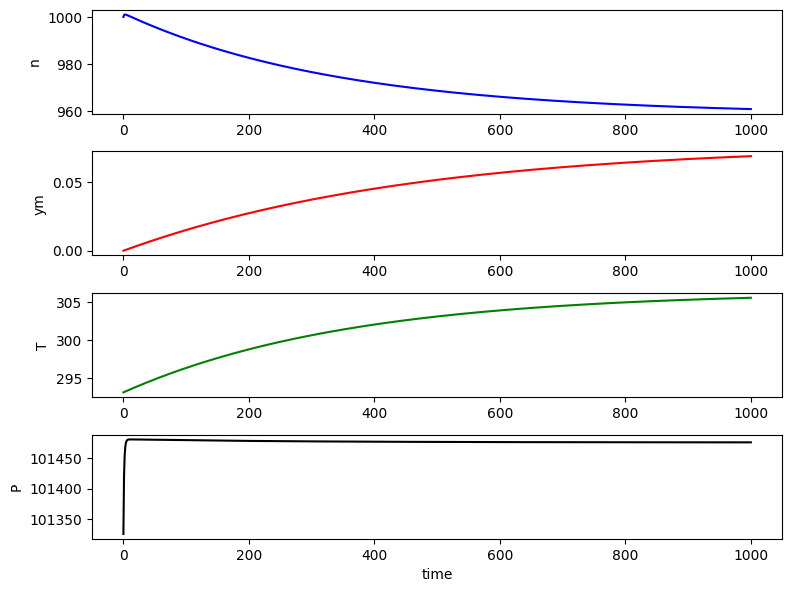

In [26]:
#Mass and energy balance solution for Example 4
#     air flow into room at 20C, methane flow into room at 200C, air/methane mixture leaves the room
#     determine the fraction of methane and air temperature as a function of time

import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# Parameters
Cv_m = 27 # J/mol-K specific heat of methane, (estimate) assumed constant but is a function of temperature
Cv_air = 29 # J/mol-K specific heat of air, (estimated) assumed constant but is a function of temperature
#stream flow rates
nin_air = 2 # mol/s air flow rate
nin_m = 1/6 # mol/s methane flow rate
#stream temperatures
Pairin = 102325 # Pa, pressure of air stream entering the room
Tairin = 20 + 273.15 # K, temperature of air entering the room
Tmin = 200 + 273.15 # K, temperature of methane entering the room
#room parameters
orifice_diameter = 0.5 # m (outlet diameter)
Cd = 0.6 # discharge coefficient
Pext = 101325 # Pa, external pressure
P_initial = Pext # Pa, constant pressure
T_initial = 20 + 273.15 # K, initial temperature of room
n_initial = 1000 # total moles in room, can be found from the volume and initial temperature and pressure
nm_initial = 0 # initial moles of methane in room


Rg = 8.314 # J/mol-K
T0 = 20 + 273.15 # K, reference temperature
Pref = 101325 # Pa, constant pressure

Vol = n_initial * Rg* T_initial/P_initial # m^3, volume of room
print(f'Volume of room = {Vol} m^3')
print(f'Air flow rate into room = {nin_air*Rg*Tairin/Pairin} m3/s')
print(f'Air flow rate into room = {nin_air} mol/s')

def nout(P, Pext, rho):
    return Cd * np.pi/4 * orifice_diameter**2 * np.sqrt(2*(P-Pext)*rho) # mol/s

def derivatives(p,t):
    # changing parameters
    n, nm, T  = p
    ym = nm/n
    Cv = ym * Cv_m + (1-ym) * Cv_air # J/mol-K, specific heat of the mixture
    Mw = ym * 0.016 + (1-ym) * 0.029 # kg/mol, molecular weight of the mixture
    P = n*Rg*T/Vol # Pa, pressure in the room
    rho = P*Mw/Rg/T # kg/m^3, density of the mixture

    # flow rate out, assume flow out is incompressible 
    nout = Cd * np.pi/4 * orifice_diameter**2 * np.sqrt(2*(P-Pext)*rho) # mol/s

    # Mass balance
    # first total mass balance
    dndt = nin_air + nin_m - nout
    # then component balance
    dnmdt = nin_m - nout * ym

    # Energy balance
    dTdt = 1/(n*Cv)*(- Cv*(T-T0)*dndt + nin_air*(Cv_air+Rg)*(Tairin-T0) + nin_m*(Cv_m+Rg)*(Tmin-T0) - nout*(Cv+Rg)*(T-T0))

    return [dndt, dnmdt, dTdt]

# time points
t = np.linspace(0,1000,1000) # seconds

# solve ODE
n0 = [n_initial, nm_initial, T_initial]
sol = odeint(derivatives, n0, t)

# plot results in a grid of subplots 
fig, ax = plt.subplots(4, 1, figsize=(8, 6))
ax[0].plot(t, sol[:, 0], 'b', label='n')
ax[0].set_ylabel('n')
ax[1].plot(t, sol[:, 1]/sol[:,0], 'r', label='ym')
ax[1].set_ylabel('ym')
ax[2].plot(t, sol[:, 2], 'g', label='T')
ax[2].set_ylabel('T')
ax[3].plot(t, sol[:, 0]*Rg*sol[:,2]/Vol, 'k', label='P')
ax[3].set_ylabel('P')
ax[3].set_xlabel('time')
fig.tight_layout(pad = 1.0)
plt.show()


## Control Techniques
There are multiple control techniques that can be used to reduce the exposure to workers from a toxic gas or vapor. These include:

**Inherent Safety**: Designing the process to eliminate or reduce the use of toxic gases or vapors.
- **Substitution**: Replace the toxic gas or vapor with a less toxic or non-toxic alternative.
- **Minimization**: Reduce the amount of toxic gas or vapor that is used in the workplace.
- **Isolation**: Use of barriers or other methods to separate the toxic gas or vapor from workers.
    
**Engineering Controls**: Use of ventilation, enclosures, or other engineering controls to reduce the concentration of the toxic gas or vapor in the workplace.

**Administrative Controls**: Use of work practices, policies, and procedures to reduce the exposure of workers to toxic gases or vapors.

**Personal Protective Equipment (PPE)**: Use of PPE such as respirators (full or half face) or supplied air respirators to reduce the exposure of workers to toxic gases or vapors.

### Engineering Controls

**Ventilation**:
Ventilation occurs with HVAC systems where air is circulated and filtered. However, most of the air is recirculated and only a small fraction is replaced with fresh air. The recirculation of air can lead to a build up of toxic gases and or distribute them to other areas of the workplace.

Ventilation where outside air is brought in can help reduce the concentration of toxic gases or vapors but it has significant energy costs.

Typical ventilation occurs with negative rather than positive pressure systems. Know the difference between positive and negative pressure systems and why one might be used over the other.

**Local Venilation: Hoods**

Hoods are effective at containing an expelling toxic gases or vapors. However, they can be expensive to install and maintain. They also require a significant amount of energy to operate.